<a href="https://colab.research.google.com/github/w4bo/2024-bbs-dm/blob/main/materials/01-DataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import warnings
warnings.filterwarnings('ignore')

# Integrated analytics lab



Data analysis involves several steps:

1. **Frame the problem** and look at the big picture
   - Define the objective in business terms
   - How should performance be measured?
1. **Get the data**
   - List the data you need and how much you need
   - Collect of data from one or more sources (database, web, etc.)
     - In this lab, things are much simpler
1. **Explore the data** to gain insights
   - Create an environment to keep track of your data exploration
     - You have been provided with notebook environments
   - Understanding of the structure and meaning of data
1. **Transformation of data** into manageable formats for subsequent steps
1. **Extraction of knowledg**e from data (statistics, models, patterns, etc.)
1. **Validation** of the extracted knowledge
1. **Deployment** of the extracted knowledge and models

Does it ring a bell?

## The CRISPDM model

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b9/CRISP-DM_Process_Diagram.png/1024px-CRISP-DM_Process_Diagram.png)

The CRISPDM tells us that we don't do machine learning for the sake of training machine learning models

- We have real problems to solve
- Machine learning is not a simple copy and paste of code
- A data scientist must understand the data and the domain before trying any model

## Domain understanding

The process of identifying and delving into the problem to solve

- This is an *interdisciplinary* step
- Even if you have good knowledge in the fields of computer and data science...
- ... maybe you still miss domain knowledge that is fundamental to understand and model the problem

## Data collection & understanding

The process of gathering and measuring information on targeted variables in an established system, which then enables one to answer relevant questions and evaluate outcomes.

- The *goal* for all data collection is to capture evidence that allows data analysis to lead to the formulation of credible answers to the questions that have been posed.

Several *biases* can occur:

- **Selection**: the sample used for data collection is not representative of the population being studied
- **Sampling**: Arises when certain segments of the population are more likely to be included or excluded from the sample
- **Response**: Occurs when participants in a survey or study provide inaccurate or misleading responses
- **Confirmation**: Refers to the tendency to favor information that confirms pre-existing beliefs or hypotheses while ignoring or discounting contradictory evidence
- **Cultural**: Occurs when data collection methods, survey questions, or study designs are culturally insensitive or fail to account for cultural differences
- **Time-Interval**: Occurs when the timing of data collection influences the results
- **Publication**: Tendency for researchers or journals to publish studies with positive or significant results while neglecting to publish studies with null or negative results
- ... and many others

Plus,

- You should consider a tradeoff between time/costs
- How much is *enough*

## Data preprocessing

Data preprocessing plays a key role in a data analytics process and avoids “Garbage in, garbage out” [1]

- A broad range of activities; from correcting errors to selecting the most relevant features
- There are no pre-defined rules on the impact of pre-processing transformations
- Data scientists cannot easily foresee the impact of pipeline prototypes

“Garbage in, garbage out” is particularly applicable to data mining and machine learning
- Out-of-range values (e.g., Income: −100)
- Impossible data combinations (e.g., Exam mark: 15, Exam result: Passed) 
- Missing values
- Inconsistent data among multiple sources
- More?
    
[1] Joseph Giovanelli, Besim Bilalli, Alberto Abelló: Effective data pre-processing for AutoML. DOLAP 2021

### Data variety

![image](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*YejjU_69ffDyrC0z-X9jYQ.jpeg)

Considering `(volume, variety, velocity, veracity)`, we focus on the `(*, structured, batch, *)` scenario

### Relational data

**Relational data** are usually collected in **tabular** format

- Each row is an **observation** (instance or tuple)
    - An object of the analysis
    - E.g., a product for market basket analysis
- Each column is an **attribute** (or feature) characterizing each object
    - All values within a column have the same type (i.e., all values belong to the same attribute domain)
    - E.g., the attributes ID (int), ProductName (str), or Price (float)

**Pandas** is the shorthand for 'Python and Data Analysis'

- It provides a rich set of features for exploring and manipulating data
- https://pandas.pydata.org/

pandas (Python) is a solution for the manipulation of relational data

- Two main data types: Series (e.g., temporal series) and DataFrame (e.g., table)
- Support to SQL-like operations (join/merge, aggregation, etc.)
- Imputation of missing values
- Manipulation of data shape
- By convention, the package pandas is imported as “pd”


In [1]:
import pandas as pd
print(pd.__version__)

1.5.3


... plus we will use other libraries

In [2]:
import numpy as np  # fast operations on arrays
import seaborn as sns  # plots
import matplotlib.pyplot as plt  # plots

Pandas relies on DataFrame and Series



**DataFrame**:
- Two-dimensional, size-mutable, potentially heterogeneous tabular data.
- The primary pandas data structure.
- Data structure also contains labeled axes (rows and columns).
- Arithmetic operations align on both row and column labels.
- Can be thought of as a dict-like container for Series objects.
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [3]:
# create a numeric dataframe/table
df = pd.DataFrame([[i + j for i in range(10)] for j in range(5)],
                  index=[i for i in range(5)],
                  columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,0,1,2,3,4,5,6,7,8,9
1,1,2,3,4,5,6,7,8,9,10
2,2,3,4,5,6,7,8,9,10,11
3,3,4,5,6,7,8,9,10,11,12
4,4,5,6,7,8,9,10,11,12,13


A **Series** is a sequence of values with the same type

- Each value is associate with a label
- Supported values and label types are the ones from NumPy (float64, int64, etc.)
- In other words, a series is a mono-dimensional vector of elements

The index of a series is the sequence of labels

- Label are usually numeric or string identifiers
- E.g., the primary key of a database table
- Labels could repeat within the series, but usually do not

Technically

- One-dimensional ndarray with axis labels (including time series).
- Labels need not be unique but must be a hashable type (both integer- and label-based indexing).
- Operations between Series (e.g., +, -, /) align values based on their associated index values.
- https://pandas.pydata.org/docs/reference/api/pandas.Series.html

In [4]:
pd.Series([1, 2, 3], index=["a", "b", "c"])

a    1
b    2
c    3
dtype: int64

In [5]:
# Select a column (i.e., a series) as in a SQL projection
df['a']

0    0
1    1
2    2
3    3
4    4
Name: a, dtype: int64

In [6]:
# Add another column to the dataframe
df['k'] = df['a'] * df['b']
df

,a,b,c,d,e,f,g,h,i,j,k
0,0,1,2,3,4,5,6,7,8,9,0
1,1,2,3,4,5,6,7,8,9,10,2
2,2,3,4,5,6,7,8,9,10,11,6
3,3,4,5,6,7,8,9,10,11,12,12
4,4,5,6,7,8,9,10,11,12,13,20


... doing some element-wise operations

In [7]:
ser_a = pd.Series([1, 2, 3], index=["a", "b", "c"])
ser_b = pd.Series([1, 2, 3], index=["b", "a", "c"])
ser_a + ser_b

a    3
b    3
c    6
dtype: int64

In [8]:
ser_a - ser_b

a   -1
b    1
c    0
dtype: int64

In [9]:
ser_a * ser_b

a    2
b    2
c    9
dtype: int64

In [10]:
ser_a / ser_b

a    0.5
b    2.0
c    1.0
dtype: float64

... doing some aggregation 

In [11]:
ser_c = df["a"]
ser_c.count()  # => 5
ser_c.sum()    # => 10
ser_c.mean()   # => 2.0
ser_c.max()    # => 4
ser_c.min()    # => 0
ser_c.idxmax() # => 4

4

Which transformations can we apply?
- **Encoding**: transforming categorical attributes into continuous ones
- **Discretization**: transforming continuous attributes into categorical ones
- **Normalization**: normalizing continuous attributes such that their values fall in the same range
- **Imputation**: imputing missing values
- **Rebalancing**: adjusting the class distribution of a dataset (i.e., the ratio between the different classes/categories represented)
- **Feature Engineering**: defining the set of relevant attributes (variables, predictors) to be used in model construction

### Understanding data types

"It is imperative to know the attribute properties to carry out meaningful operations and research with them"

Why is data type important?

![image](https://user-images.githubusercontent.com/18005592/232748093-a25e8ba7-24d4-4e2b-9e58-1553786cac33.png)


Encoding the date 2022-01-01T00:01 into a signed integer $2201010001$

However, a signed integer is a 32-bit datum that represents an integer in the range:

$[-2^{31}, 2^{31}-1] = [-2147483648, 2147483647]$

$2201010001 > 2147483647$

What are the implications of a data type?

Pandas automatically infers data types, or they can be specified during creation
- Common data types are numeric ones
    - `np.floatN` represents floating numbers (e.g., -3.14)
    - `np.intN`/`np.uintN` represent integers with/without sign (-42 and 42)
    - `N` is the number of needed bits: 8, 16, 32 o 64
- Other data types
    - `bool`: Boolean values
    - `datetime64`, timedelta64: timestamp and time intervals
    - `object`: mainly used for strings

In [12]:
df = pd.DataFrame([
    ['Cola',   'low',    '05/07/2021', 10],
    ['Bread',  'medium', '05/07/2021', 25],
    ['Beer',   'high',   '06/07/2021', 100],
    ['Diaper', 'high',   '06/07/2021', np.nan],
    ['Pizza',  'medium', '06/07/2021', 25]], columns=['ID', 'PriceBin', 'Date', 'Quantity'])
df

,ID,PriceBin,Date,Quantity
0,Cola,low,05/07/2021,10.0
1,Bread,medium,05/07/2021,25.0
2,Beer,high,06/07/2021,100.0
3,Diaper,high,06/07/2021,NaN
4,Pizza,medium,06/07/2021,25.0


The attribute type determines which operator can be applied to the attribute
- Equality, sort, sum, ratio, etc.
- It makes sense to compute the average `Quantity` but not the average `ID`

Different attribute types

- (Categorical) **Nominal**: can distinguish the values (i.e., check equality)
- (Categorical) **Ordinal**: can distinguish and sort the values
- (Numeric) **Interval**: can distinguish and sort the values, and compute their difference
- (Numeric) **Ratio**: can distinguish and sort the values, and compute their difference and ratio

In [13]:
df.dtypes

ID           object
PriceBin     object
Date         object
Quantity    float64
dtype: object

In [14]:
# data profiling
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        5 non-null      object 
 1   PriceBin  5 non-null      object 
 2   Date      5 non-null      object 
 3   Quantity  4 non-null      float64
dtypes: float64(1), object(3)
memory usage: 288.0+ bytes


In [15]:
# To get some statistics (e.g., count, mean, std, min, etc.)
df.describe(include='all')

,ID,PriceBin,Date,Quantity
count,5,5,5,4.000000
unique,5,3,2,NaN
top,Cola,medium,06/07/2021,NaN
freq,1,2,3,NaN
mean,NaN,NaN,NaN,40.000000
std,NaN,NaN,NaN,40.620192
min,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,21.250000
50%,NaN,NaN,NaN,25.000000
75%,NaN,NaN,NaN,43.750000


In [16]:
# Get the headers (i.e., the column names)
df.columns

# Get just the first two rows
df.head(2)

# Get just the last two rows
df.tail(2)

# Sort the dataframe by columns
df.sort_values(by=['Quantity', 'ID'], ascending=[False, True])

,ID,PriceBin,Date,Quantity
2,Beer,high,06/07/2021,100.0
1,Bread,medium,05/07/2021,25.0
4,Pizza,medium,06/07/2021,25.0
0,Cola,low,05/07/2021,10.0
3,Diaper,high,06/07/2021,NaN


### Data distribution

In [17]:
# array with distinct values sorted by first appearance
df["Quantity"].unique() 

array([ 10.,  25., 100.,  nan])

In [18]:
# quantity of unique values
df["Quantity"].nunique()

3

In [19]:
# return a new series that associates each value with its number of occurrences, sorted by frequency
df["Quantity"].value_counts()

25.0     2
10.0     1
100.0    1
Name: Quantity, dtype: int64

<Axes: >

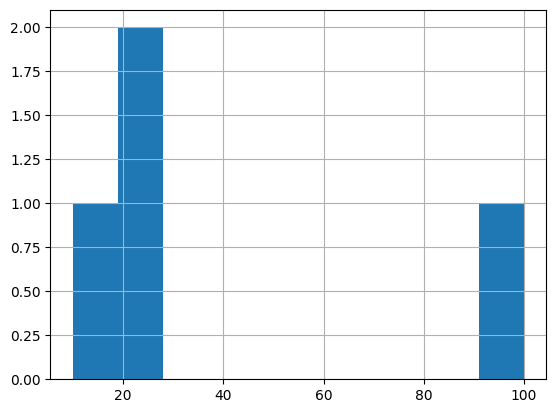

In [20]:
df["Quantity"].hist(bins=10)

Which problems can cause skewed distributions?

![image](https://user-images.githubusercontent.com/18005592/232750742-aacbf6b3-8a7d-49c6-b253-5ab8e7985104.png)

Things are even more complex when applying sequences of transformations

- E.g., normalization should be applied before rebalancing since rebalancing (e.g., by resampling) alters average and standard deviations
- E.g., applying feature engineering before/after rebalancing produces different results which depends on the dataset and the algorithm

![image](https://user-images.githubusercontent.com/18005592/232754117-8a84fde5-bce2-41b1-a003-7dfa0b63f980.png)

More an art than a science
- ... At least for now


### Missing values

Datasets often show missing values
- E.g., they are not applicable (e.g., date of death) or unknown
- A series can have missing values, referred to as `NA` (Not Available)
- Numeric attributes: `NA` is `np.nan` (Not a Number)
- `nan` is never equal, greater, or lower than other values (nor itself)

        np.nan == np.nan
        False
- Numeric expressions with `nan` return `nan`

        2 * np.nan – 1
        nan
Which problems arise from missing values?

In [21]:
# add the column "isna", True if the value is NaN
df["isna"] = df["Quantity"].isna()
# add the column "notna", False if the value is NaN
df["notna"] = df["Quantity"].notna()
df[["Quantity", "isna", "notna"]]

,Quantity,isna,notna
0,10.0,False,True
1,25.0,False,True
2,100.0,False,True
3,NaN,True,False
4,25.0,False,True


#### Imputing missing values

Several strategies

- Replace `nan` with average or median values
- Dropping rows/columns with nans

What are the effects?

What if we have temporal attributes?

In [22]:
# fill the missing value with the average
df["Quantity_imputed"] = df["Quantity"].fillna(df["Quantity"].mean())  # fillna replaces NA values
df[["Quantity", "Quantity_imputed"]]

,Quantity,Quantity_imputed
0,10.0,10.0
1,25.0,25.0
2,100.0,100.0
3,NaN,40.0
4,25.0,25.0


In [23]:
# fill the missing value with the previous (not NaN) value
df["Quantity"].fillna(method="ffill")

0     10.0
1     25.0
2    100.0
3    100.0
4     25.0
Name: Quantity, dtype: float64

In [24]:
# fill the missing value with the following (not NaN) value
df["Quantity"].fillna(method="bfill")

0     10.0
1     25.0
2    100.0
3     25.0
4     25.0
Name: Quantity, dtype: float64

In [25]:
df["Quantity"].dropna()

0     10.0
1     25.0
2    100.0
4     25.0
Name: Quantity, dtype: float64

In [26]:
df.dropna()

,ID,PriceBin,Date,Quantity,isna,notna,Quantity_imputed
0,Cola,low,05/07/2021,10.0,False,True,10.0
1,Bread,medium,05/07/2021,25.0,False,True,25.0
2,Beer,high,06/07/2021,100.0,False,True,100.0
4,Pizza,medium,06/07/2021,25.0,False,True,25.0


# The `Housing` case study

Check also: 

- https://www.kaggle.com/camnugent/california-housing-prices
- https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/

We will use the California Housing Prices dataset.
Our task is to use California census data to forecast housing prices given the population, median income, and median housing price for each block group in California.
Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).
We will just call them "districts" for short

In [27]:
# df = pd.read_csv("datasets/2022-bbs-dsaa-housing.csv", delimiter=",")
df = pd.read_csv("https://raw.githubusercontent.com/w4bo/handsOnDataPipelines/main/materials/datasets/housing.csv", delimiter=",")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


... and now?

Answer some questions:

- Which attributes (i.e., columns) are contained in the dataset?
- Which is their semantics?

In [28]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

Dataset description

1. `longitude`: A measure of how far west a house is; a higher value is farther west
2. `latitude`: A measure of how far north a house is; a higher value is farther north
3. `housingMedianAge`: Median age of a house within a block; a lower number is a newer building
4. `totalRooms`: Total number of rooms within a block
5. `totalBedrooms`: Total number of bedrooms within a block
6. `population`: Total number of people residing within a block
7. `households`: Total number of households, a group of people residing within a home unit, for a block
8. `medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. `medianHouseValue`: Median house value for households within a block (measured in US Dollars)
10. `oceanProximity`: Location of the house w.r.t ocean/sea

In [29]:
# show some statistics on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [30]:
df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


... are you satisfied with the understanding?

... what about data visualization?

Can we exploit the nature of the data?

<Axes: xlabel='longitude', ylabel='latitude'>

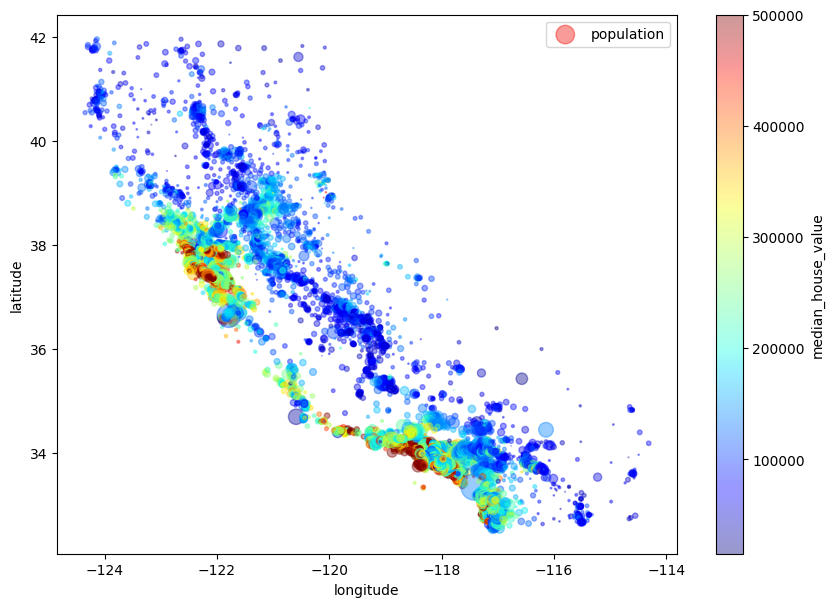

In [31]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=df["population"]/100, label="population", figsize=(10,7), c="median_house_value", cmap="jet", colorbar=True)

What if we integrate open data?

Can we exploit the nature of the data... again?

![image](https://github.com/w4bo/2024-bbs-dm/assets/18005592/06d9fd78-5856-4119-accb-62de0f54b680)


![image](https://user-images.githubusercontent.com/18005592/232756567-b706619a-2cc9-4b45-b78f-5172103e0c3b.png)

#### Memory usage

What if I change float64 to float32?

In [32]:
dff = df.copy(deep=True)  # copy the dataframe
for x in df.columns:  # iterate over the columns
    if dff[x].dtype == 'float64':  # if the column has type `float64`
        dff[x] = dff[x].astype('float32')  # ... change it to `float32`
dff.info()  # show some statistics on the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float32
 1   latitude            20640 non-null  float32
 2   housing_median_age  20640 non-null  float32
 3   total_rooms         20640 non-null  float32
 4   total_bedrooms      20433 non-null  float32
 5   population          20640 non-null  float32
 6   households          20640 non-null  float32
 7   median_income       20640 non-null  float32
 8   median_house_value  20640 non-null  float32
 9   ocean_proximity     20640 non-null  object 
dtypes: float32(9), object(1)
memory usage: 887.0+ KB


#### Missing values
There are some missing values for `total_bedrooms`. What should we do?

Most Machine Learning algorithms cannot work with missing features. We have three options:
- Get rid of the corresponding districts (i.e., drop the rows)
    - `df.dropna(subset=["total_bedrooms"])`
- Get rid of the whole attribute (i.e., drop the columns)
    - `df.drop("total_bedrooms", axis=1`
- Set the values to some value (zero, the mean, the median, etc.)
    - `df["total_bedrooms"].fillna(df["total_bedrooms"].median())`

#### Non-numeric attributes
`ocean_proximity` is a text attribute so we cannot compute its median. Some options:
- Get rid of the whole attribute. (`df.drop("ocean_proximity", axis=1`)
- Change from categorical to ordinal (e.g., `NEAR BAY` = 0, `INLAND` = 1)
    - Can foresee any problem in this?
    - ML algorithms will assume that two nearby values are more similar than two distant values. This may be fine in some cases (e.g., for ordered categories such as “bad”, “average”, “good”, “excellent”), but it is obviously not the case for the ocean_proximity column (for example, categories 0 and 4 are clearly more similar than categories 0 and 1). 
- Change from categorical to one hot encoding
    - To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the category is “<1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the category is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding, because only one attribute will be equal to 1 (hot), while the others will be 0 (cold). The new attributes are sometimes called dummy attributes

In [33]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

<Axes: >

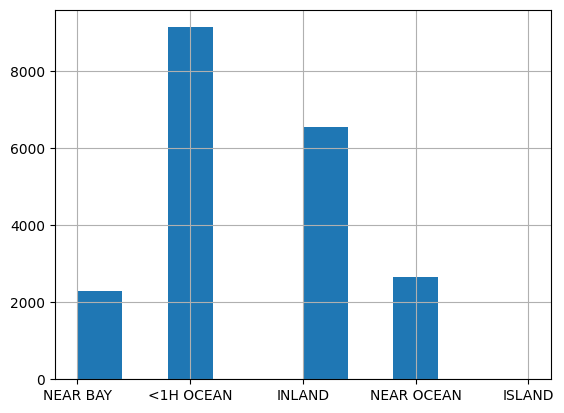

In [34]:
df["ocean_proximity"].hist()

Change from categorical to ordinal

In [35]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
y = ordinal_encoder.fit_transform(df[["ocean_proximity"]])
y

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

From categorical to one-hot encoding

In [36]:
y = pd.get_dummies(df["ocean_proximity"], prefix='ocean_proximity')
y

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


### Visualization

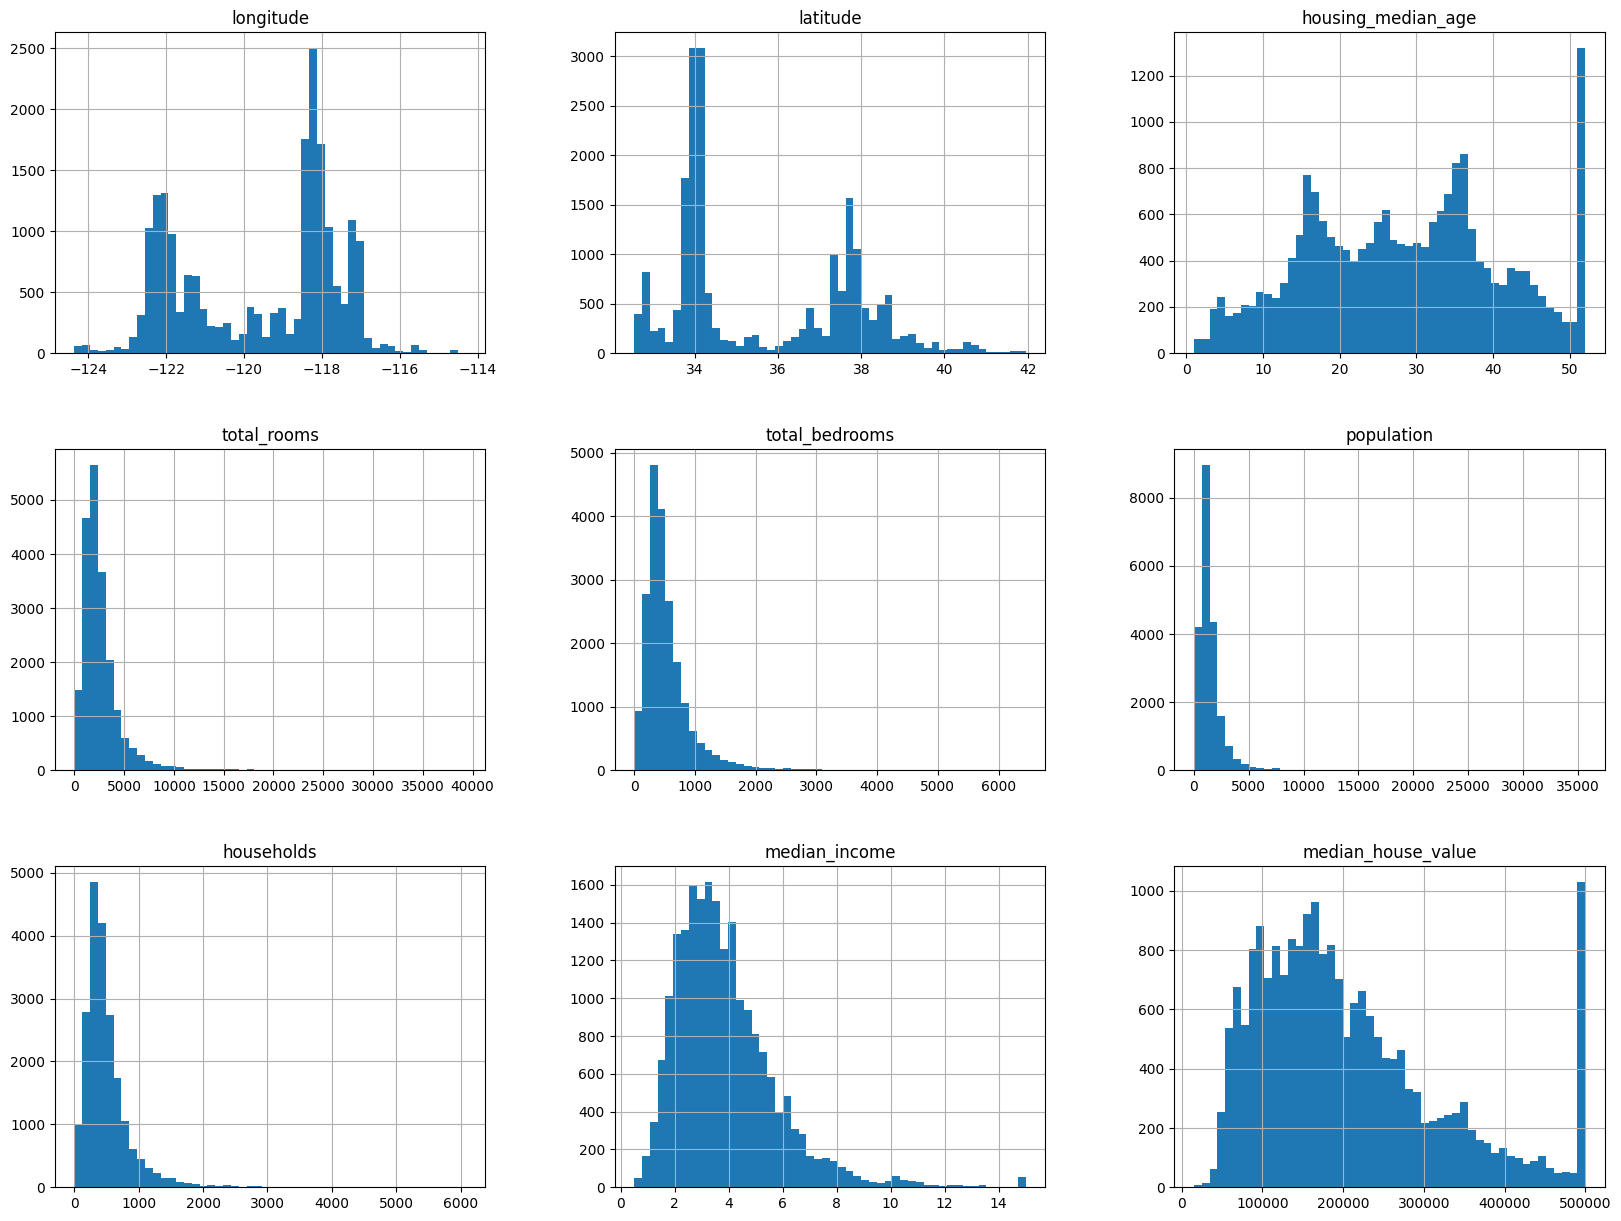

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=50, figsize=(20, 15))
plt.show()

Open questions:

- `median_income` should be in dollars. However, it has a strange range. Why? "you are told that the data has been scaled and capped at 15 (actually 15.0001) for higher median incomes, and at 0.5 (actually 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars. The numbers represent roughly tens of thousands of dollars"
- `housing_median_age` and `median_house_value` are capped. As to `median_house_value`, this is a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit. You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond 500,000USD, then you have mainly two options: (a) collect proper labels for the districts whose labels were capped, (b) remove those districts from the training set."
- These attributes have very different scales. Should we scale them?
- Many histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns

Are the relationships between variables?

- A grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column
- The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.


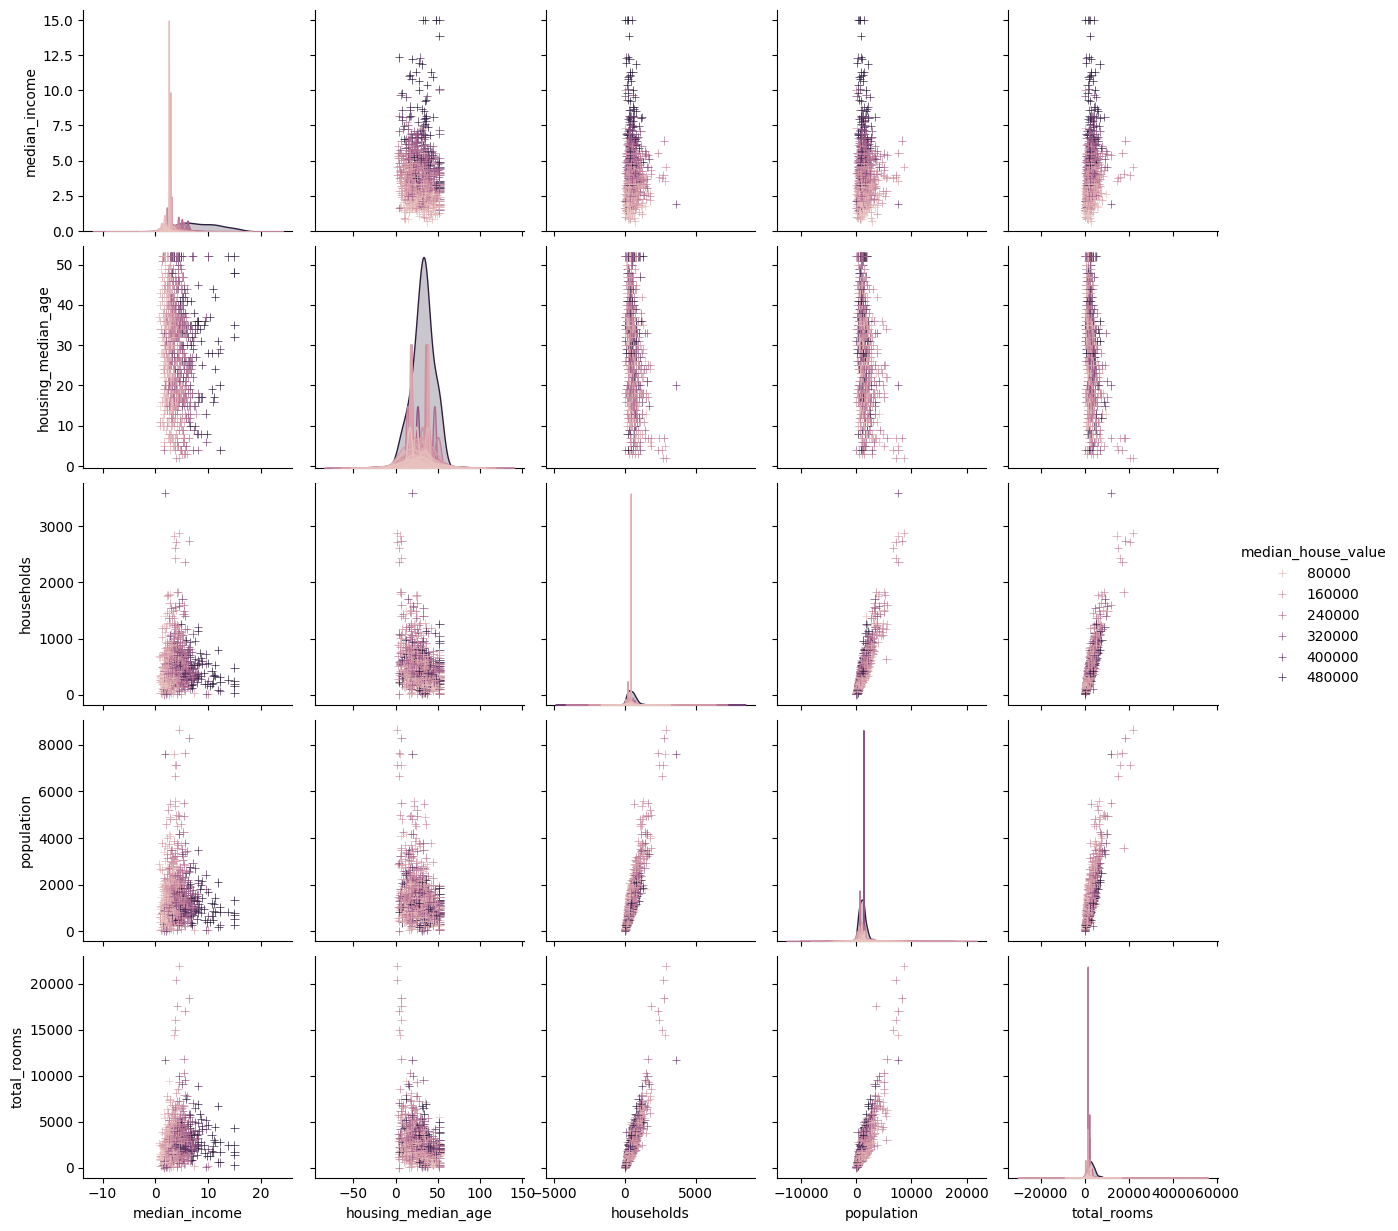

In [38]:
tmp = df[["median_income", "housing_median_age", "median_house_value", "households", "population", "total_rooms"]]
sns.pairplot(tmp.sample(n=1000, random_state=42), hue='median_house_value', markers='+')
plt.show()

Check correlations and intervals

In [39]:
from scipy.stats import pearsonr
rho = df.corr(method='pearson', numeric_only=True)
pval = df.corr(method=lambda x, y: pearsonr(x, y)[1], numeric_only=True) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01, 0.05, 0.1] if x <= t]))
rho.round(2).astype(str) + p

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.0***,-0.92***,-0.11***,0.04***,0.07***,0.1***,0.06***,-0.02**,-0.05***
latitude,-0.92***,1.0***,0.01,-0.04***,-0.07***,-0.11***,-0.07***,-0.08***,-0.14***
housing_median_age,-0.11***,0.01,1.0***,-0.36***,-0.32***,-0.3***,-0.3***,-0.12***,0.11***
total_rooms,0.04***,-0.04***,-0.36***,1.0***,0.93***,0.86***,0.92***,0.2***,0.13***
total_bedrooms,0.07***,-0.07***,-0.32***,0.93***,1.0***,0.88***,0.98***,-0.01,0.05***
population,0.1***,-0.11***,-0.3***,0.86***,0.88***,1.0***,0.91***,0.0,-0.02***
households,0.06***,-0.07***,-0.3***,0.92***,0.98***,0.91***,1.0***,0.01*,0.07***
median_income,-0.02**,-0.08***,-0.12***,0.2***,-0.01,0.0,0.01*,1.0***,0.69***
median_house_value,-0.05***,-0.14***,0.11***,0.13***,0.05***,-0.02***,0.07***,0.69***,1.0***


<Axes: >

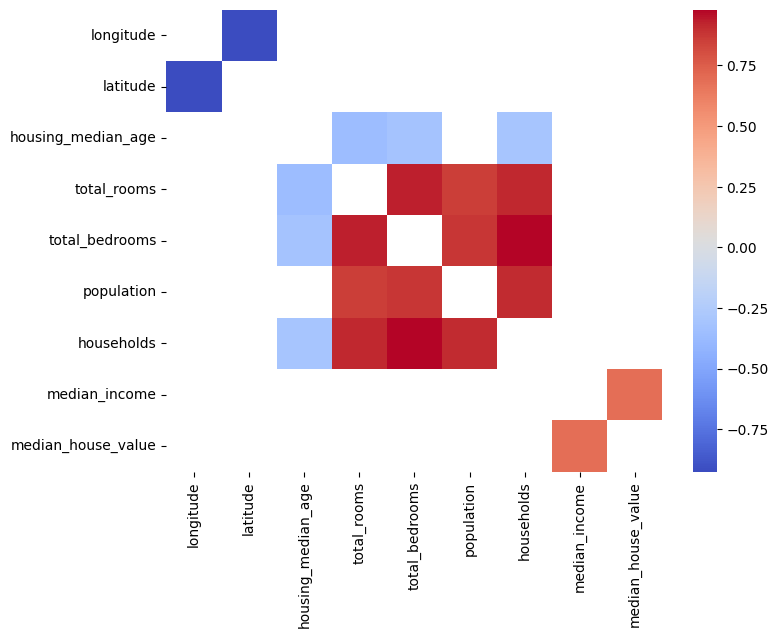

In [40]:
min_corr = 0.3
kot = rho[(abs(rho) >= min_corr) & (rho < 1)]
plt.figure(figsize=(8, 6))
sns.heatmap(kot, cmap=sns.color_palette("coolwarm", as_cmap=True))

#### Scaling attributes

Attributes have very different scales. Should we scale them?


- Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.
- Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.


#### Min-max normalization

In [41]:
num_df = df.drop(columns=['ocean_proximity', 'median_house_value'])
normalized_df = (num_df - num_df.min()) / (num_df.max() - num_df.min())
normalized_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776
...,...,...,...,...,...,...,...,...
20635,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130
20636,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853
20637,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764
20638,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295


#### Standardization

In [42]:
num_df = df.drop(columns=['ocean_proximity', 'median_house_value'])
normalized_df = (num_df - num_df.mean()) / num_df.std()
normalized_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-1.327803,1.052523,0.982119,-0.804800,-0.970301,-0.974405,-0.977009,2.344709
1,-1.322812,1.043159,-0.607004,2.045841,1.348243,0.861418,1.669921,2.332181
2,-1.332794,1.038478,1.856137,-0.535733,-0.825541,-0.820757,-0.843616,1.782656
3,-1.337785,1.038478,1.856137,-0.624199,-0.718750,-0.766010,-0.733764,0.932945
4,-1.337785,1.038478,1.856137,-0.462393,-0.611959,-0.759828,-0.629142,-0.012881
...,...,...,...,...,...,...,...,...
20635,-0.758808,1.801603,-0.289180,-0.444974,-0.388886,-0.512579,-0.443438,-1.216099
20636,-0.818702,1.806285,-0.845373,-0.888682,-0.920466,-0.944382,-1.008396,-0.691576
20637,-0.823693,1.778194,-0.924829,-0.174991,-0.125468,-0.369528,-0.174037,-1.142566
20638,-0.873605,1.778194,-0.845373,-0.355591,-0.305826,-0.604415,-0.393743,-1.054557


This checklist can help you while building your projects
- Frame the problem and look at the big picture
   - ✔ Define the objective in business terms
   - ✖ How should performance be measured?
- Get the data
   - ✔ List the data you need and how much you need
- Explore the data to gain insights
   - ✔ Create an environment to keep track of your data exploration 
   - ✔ Study each attribute and its characteristics
- Prepare the data
   - ✔ Fix or remove outliers (optional)
   - ✔ Fill in missing values (e.g., with zero, mean, median…) or drop their rows (or columns)
   - ✔ Feature selection (optional): drop the attributes that provide no useful information for the task
   - ✔ Feature engineering, where appropriate: discretize continuous features


#### Hands on!

In [43]:
num_df = df.copy(deep=True).drop(columns=["ocean_proximity"])  # do not change this line

# Filling in (i.e., impute) missing values with the median value
num_df["total_bedrooms"] = 1  # change `1` with the proper solution

# Add a new column: population_per_household = population / households
num_df["population_per_household"] = 1  # change `1` with the proper solution

# Add a new column: rooms_per_household = total_rooms / households
num_df["rooms_per_household"] = 1  # change `1` with the proper solution

# Add a new column: bedrooms_per_room = total_bedrooms / total_rooms
num_df["bedrooms_per_room"] = 1  # change `1` with the proper solution

# Apply standardization to all the numeric columns
num_df = pd.DataFrame()  # change `pd.DataFrame()` with the proper solution

# One hot encode `ocean_proximity` since it is a categorical attribute
# change `pd.DataFrame()` with the proper solution (hint: pd.get_dummies)
cat_df = pd.DataFrame()

clean_df = pd.concat([num_df, cat_df], axis=1)  # do not change this line
clean_df

""
